In [1]:
#changing directory
import os 
os.chdir("/Users/rakeshravi/Downloads")

In [3]:
#importing dataset
import pandas as pd
df = pd.read_csv('honeypot1_removed_collisions.csv')

In [26]:
#noticed that timestamp is not a date-time object
#converting timestamp to a date-time object
# from dateutil.parser import parse
# for index, row in df.iterrows():
df['timestamp'] = df['timestamp'].astype(str)
df['timestamp_new'] = df['timestamp'].apply(parse)


In [ ]:
#dropping unnecessary columns and taking a look at the dataset
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

In [29]:
#converting datetime object into seconds from the start of day
import time
from datetime import datetime
df["seconds"] = df["timestamp_new"].dt.hour*3600 + df["timestamp_new"].dt.minute*60 + df["timestamp_new"].dt.second

In [32]:
df["seconds"].head()

0     9391
1     9394
2    34113
3    34117
4    80152
Name: seconds, dtype: int64

In [34]:
80152//12

6679

In [147]:
#initializing time windows
import math

windows = [1,2,3,4,5,6,7,8,9,10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 50, 120, 240]
error_root_square = []
error_difference = []
for i in windows:
    df["bucket"] = df["seconds"]//i
    error_root_square.append(math.sqrt(abs((df[["src_ip", "bucket"]].groupby(["bucket"]).agg(["nunique"]).sum().tolist()[0]**2 - 24500**2))))
    error_difference.append(abs(df[["src_ip", "bucket"]].groupby(["bucket"]).agg(["nunique"]).sum().tolist()[0]- 24500))

In [148]:
error_difference

[19669,
 17500,
 15328,
 13569,
 12042,
 10319,
 8881,
 7373,
 6133,
 5009,
 3104,
 2473,
 1755,
 1092,
 652,
 42,
 476,
 822,
 1386,
 1684,
 1923,
 2280,
 2627,
 2846,
 4192,
 7548,
 12203,
 14475]

In [149]:
df["bucket"].head()

0     39
1     39
2    142
3    142
4    333
Name: bucket, dtype: int64

In [144]:
df["seconds"].head()

0     9391
1     9394
2    34113
3    34117
4    80152
Name: seconds, dtype: int64

In [145]:
l = df[["src_ip", "bucket"]].groupby(["bucket"]).agg(["nunique"]).sum().tolist()

In [124]:
df.head()

,dest_ip,dest_port,details,session_id,software,src_ip,src_port,timestamp,flag,timestamp_new,seconds,bucket
0,128.143.31.40,23,New connection: 101.109.176.44:50343 (128.143...,57010c7fe8f7,cowrie.telnet.transport.HoneyPotTelnetFactory,10110917644,50343,2018-08-11 02:36:31.605442+00:00,1,2018-08-11 02:36:31.605442+00:00,9391,0
1,128.143.31.40,0,Connection lost after 3 seconds,0,CowrieTelnetTransport,10110917644,4410,2018-08-11 02:36:34.641459+00:00,2,2018-08-11 02:36:34.641459+00:00,9394,0
2,128.143.31.40,23,New connection: 101.128.76.252:60892 (128.143...,eee0b4a90ab9,cowrie.telnet.transport.HoneyPotTelnetFactory,10112876252,60892,2018-08-17 09:28:33.585204+00:00,1,2018-08-17 09:28:33.585204+00:00,34113,0
3,128.143.31.40,0,Connection lost after 3 seconds,0,CowrieTelnetTransport,10112876252,3696,2018-08-17 09:28:37.131087+00:00,2,2018-08-17 09:28:37.131087+00:00,34117,0
4,128.143.31.40,23,New connection: 101.128.76.252:49311 (128.143...,9de5613c279c,cowrie.telnet.transport.HoneyPotTelnetFactory,10112876252,49311,2018-08-17 22:15:52.981185+00:00,1,2018-08-17 22:15:52.981185+00:00,80152,1


In [138]:
#importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Text(0.5,1,'Error vs Bucket Size')

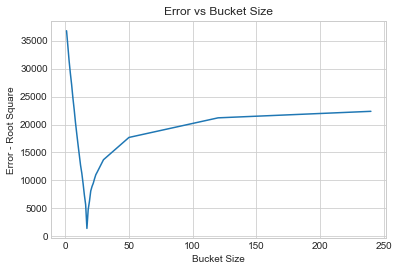

In [153]:
#error vs bucket size chart
fig = plt.figure()
ax = plt.axes()
plt.plot(windows, error_root_square);
plt.xlabel('Bucket Size')
plt.ylabel('Error - Root Square')
plt.title('Error vs Bucket Size')

Text(0.5,1,'Error vs Bucket Size')

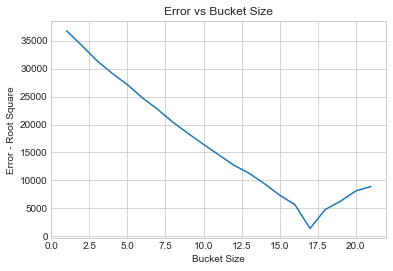

In [157]:
#error vs bucket size chart (Zoomed in)
fig = plt.figure()
ax = plt.axes()
plt.plot(windows[0:20], error_root_square[0:20]);
plt.xlabel('Bucket Size')
plt.ylabel('Error - Root Square')
plt.title('Error vs Bucket Size')

Text(0.5,1,'Error vs Bucket Size')

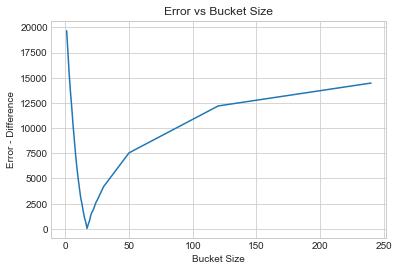

In [152]:
#error (error_difference) vs bucker size
fig = plt.figure()
ax = plt.axes()
plt.plot(windows, error_difference);
plt.xlabel('Bucket Size')
plt.ylabel('Error - Difference')
plt.title('Error vs Bucket Size')

In [154]:
#overlap analysis between
test = [1000, 10000, 50000, 100000, 1000000]
overlap  =[35.23523523523524,
19.55195519551955,
24.390487809756195,
42.19142191421914,
67.16816716816717]

Text(0.5,1,'Overlap Analysis')

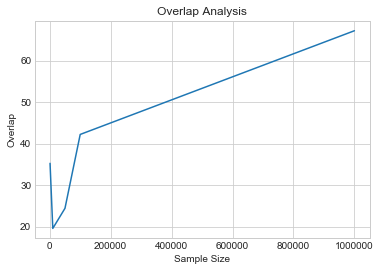

In [155]:
fig = plt.figure()
ax = plt.axes()
plt.plot(test, overlap);
plt.xlabel('Sample Size')
plt.ylabel('Overlap')
plt.title('Overlap Analysis')